<a href="https://colab.research.google.com/github/phmouras/Python_Exercises/blob/main/aulas_2021-1/Projeto1_IntroPythonUERJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega ***ESTENDIDO***: 28/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20^{\circ} \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



[-2.0, -1.6, -1.2, -0.8, -0.4, -0.0, 0.4, 0.8, 1.2, 1.6, 2.0]


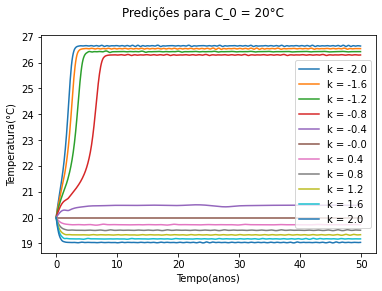

In [113]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

def func(t, y, k):
  return 1/10 * (y - 20)*(22 - y)*(y - 26) - k

y0 = [20]
t = [i for i in np.arange(0,50,0.1)]
k = np.round(np.arange(-2, 2.4, 0.4), decimals=2).tolist()
results = [solve_ivp(func, [0,50], y0, args=(v,), t_eval=t) for v in k]
for e, f in zip(results, k):
    plt.plot(e.t, e.y[0], label = f'k = {f}')

print(k)
plt.suptitle('Predições para C_0 = 20°C')
plt.xlabel('Tempo(anos)')
plt.ylabel('Temperatura(°C)')
plt.legend()
plt.show()

## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_" (ou matriz), isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** (ou de estabilização) ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico_ $T_{fin} \times k$ _é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



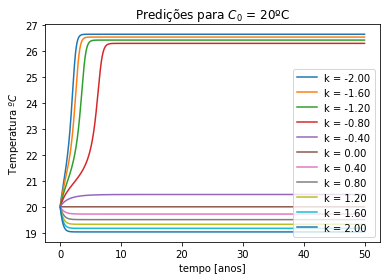

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22^{\circ} C$ ?  e se este valor flutuar em $0.1^{\circ} C$ para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21^{\circ}C$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?
